In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [ ]:
img1 = cv2.imread('cat1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

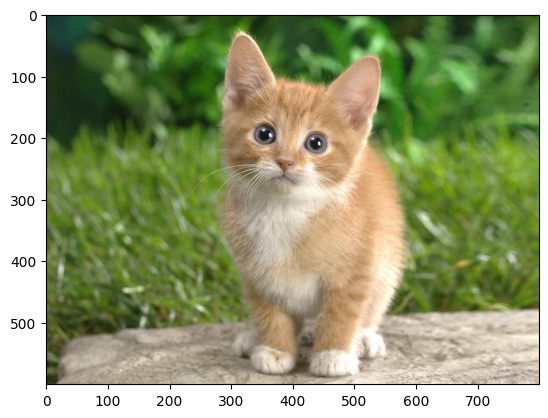

In [ ]:
plt.imshow(img1)

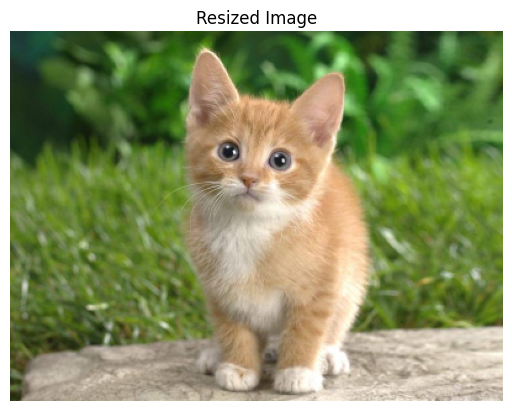

In [ ]:
resizedimg1 = cv2.resize(img1, (0,0), fx=0.5, fy=0.5)
plt.imshow(resizedimg1)
plt.title('Resized Image')
plt.axis('off')
plt.show()

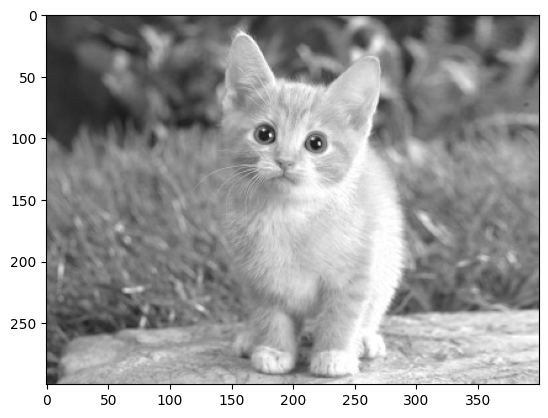

In [ ]:
img_hsv= cv2.cvtColor(resizedimg1, cv2.COLOR_RGB2HSV)

img_hsv_masked = img_hsv.copy()
img_hsv_masked[:, :, 0] = 0
img_hsv_masked[:, :, 1] = 0
img_hsv_masked = cv2.cvtColor(img_hsv_masked, cv2.COLOR_HSV2BGR)
plt.imshow(cv2.cvtColor(img_hsv_masked, cv2.COLOR_BGR2RGB))

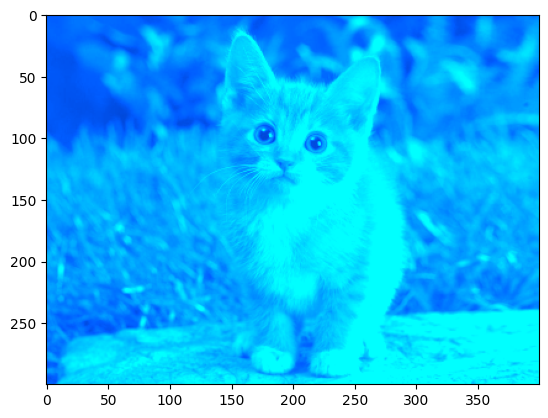

In [ ]:
img_lab = cv2.cvtColor(resizedimg1, cv2.COLOR_RGB2LAB)
img_lab_masked = img_lab.copy()
img_lab_masked[:, :, 1] = 0
img_lab_masked[:, :, 2] = 0
img_lab_masked = cv2.cvtColor(img_lab_masked, cv2.COLOR_LAB2BGR)
plt.imshow(cv2.cvtColor(img_lab_masked, cv2.COLOR_BGR2RGB))


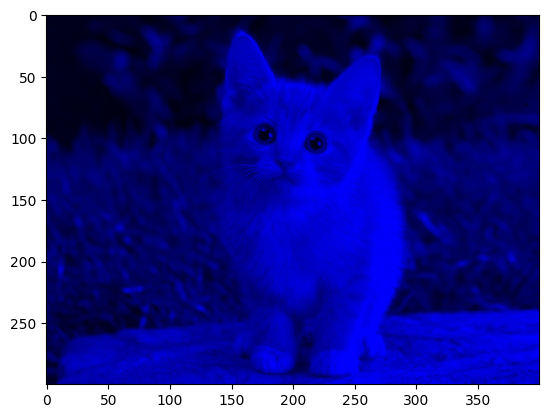

In [ ]:
img_rgb_masked = resizedimg1.copy()
img_rgb_masked[:, :, 1] = 0
img_rgb_masked[:, :, 2] = 0

plt.imshow(cv2.cvtColor(img_rgb_masked, cv2.COLOR_BGR2RGB))

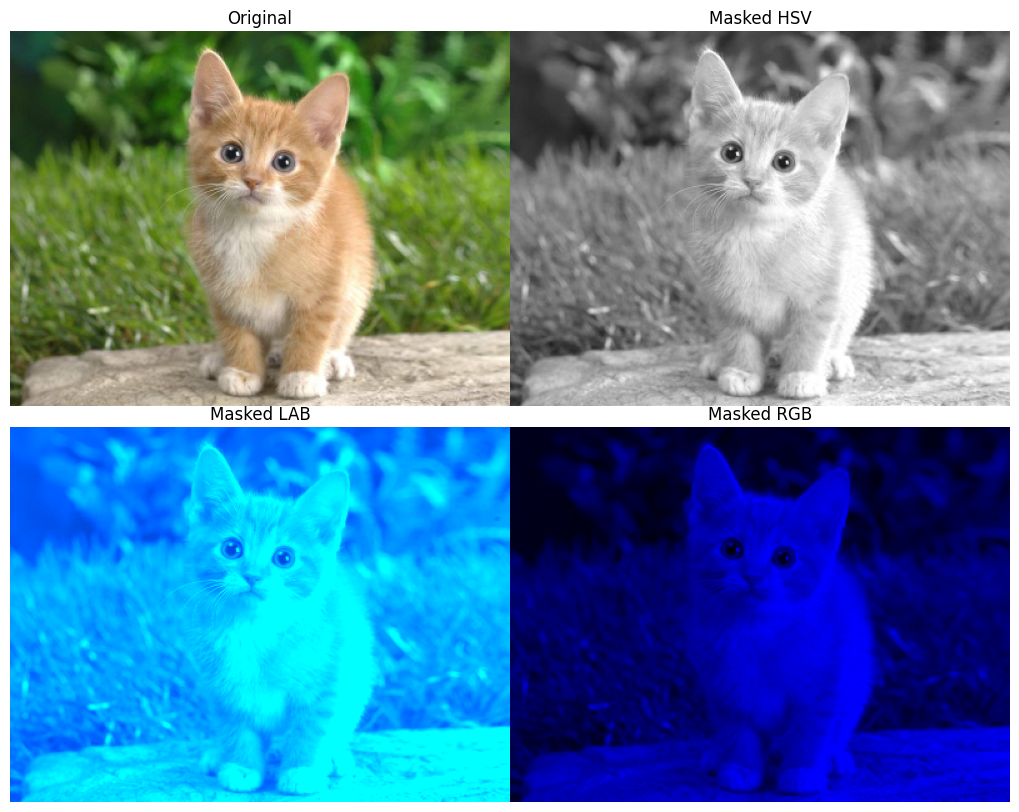

In [ ]:
plt.figure(figsize=(10, 8))

# Original
plt.subplot(2, 2, 1)
plt.imshow(resizedimg1)
plt.title('Original')
plt.axis('off')

# Masked HSV
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img_hsv_masked, cv2.COLOR_BGR2RGB))
plt.title('Masked HSV')
plt.axis('off')

# Masked LAB
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_lab_masked, cv2.COLOR_BGR2RGB))
plt.title('Masked LAB')
plt.axis('off')

# Masked RGB
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(img_rgb_masked, cv2.COLOR_BGR2RGB))
plt.title('Masked RGB')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(pad=0)
plt.show()

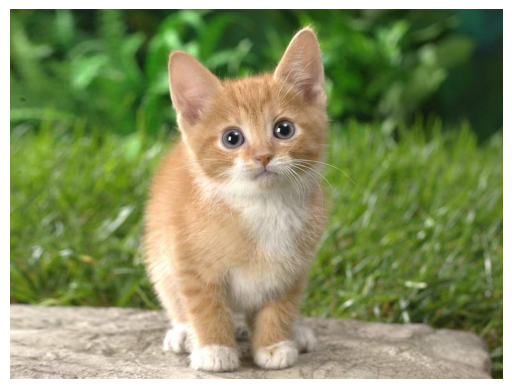

In [ ]:
flipped_img = cv2.flip(img1, 1)

plt.imshow(flipped_img)
plt.axis('off')
plt.show()

In [ ]:
rotated_img_90 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(rotated_img_90 )
plt.axis('off')
plt.show()

In [ ]:
(h, w) = img1.shape[:2]
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated_img_45 = cv2.warpAffine(img1, matrix, (w, h))

plt.imshow(rotated_img_45)
plt.axis('off')
plt.show()

In [ ]:
x = random.randint(0, img1.shape[1] - 100)
y = random.randint(0, img1.shape[0] - 100)

image_with_zeros = img1.copy()
image_with_zeros[y:y+100, x:x+100] = 0

plt.imshow(image_with_zeros)
plt.axis('off')
plt.show()

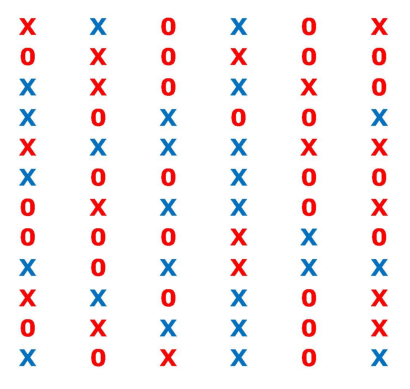

In [ ]:
# Load the red_x.png image
img2 = cv2.imread('red_x.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis('off')
plt.show()



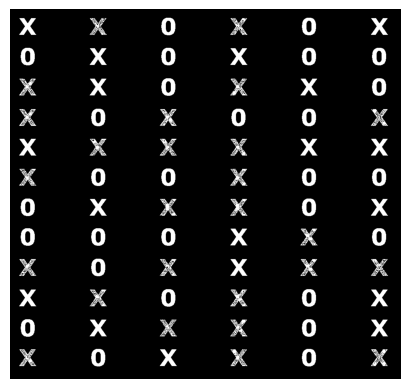

In [ ]:
# Convert it to grayscale
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Threshold the image to separate blue objects
_, thresholded = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV)

# Show the thresholded image
plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()

Number of blue X: 26


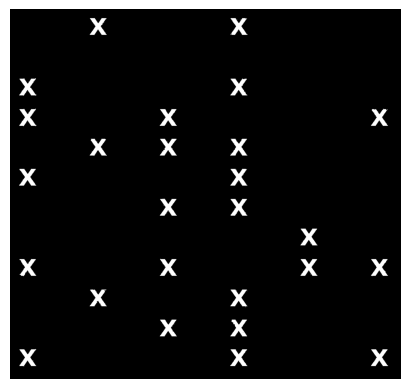

In [ ]:
 # Filter out the blue color from the image
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

# Convert to HSV and apply the mask
hsv_x_image = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv_x_image, lower_blue, upper_blue)

# Find contours of the 'X's
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of blue X
min_area = 100
blue_x_count = 0

for contour in contours:
    area = cv2.contourArea(contour)
    if area > min_area:
        blue_x_count += 1


print(f"Number of blue X: {blue_x_count}")

# Show the mask image
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()